In [1]:
#Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
import pickle
import seaborn as sns
from scipy import stats
plt.style.use('fivethirtyeight')
import warnings
warnings .filterwarnings('ignore')

In [2]:
df=pd.read_csv('99acres_data.csv')

In [3]:
df.head()

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,2 Baths,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,3 Baths,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0
2,mumbai,60000.0,2.0,2 Baths,950,Super built-up Area,Residential,Wadala,200000.0
3,mumbai,52000.0,3.0,3 Baths,1300,Carpet Area,Residential,Hiranandani Estate,300000.0
4,mumbai,30000.0,1.0,1 Bath,550,Built-up Area,Residential,Kanjurmarg (East),150000.0


Numbers Of Area Type :

Super built-up Area    69918
Carpet Area            36847
Built-up Area          29104
Plot Area              10659
Name: build_up_area, dtype: int64


<Axes: xlabel='build_up_area', ylabel='count'>

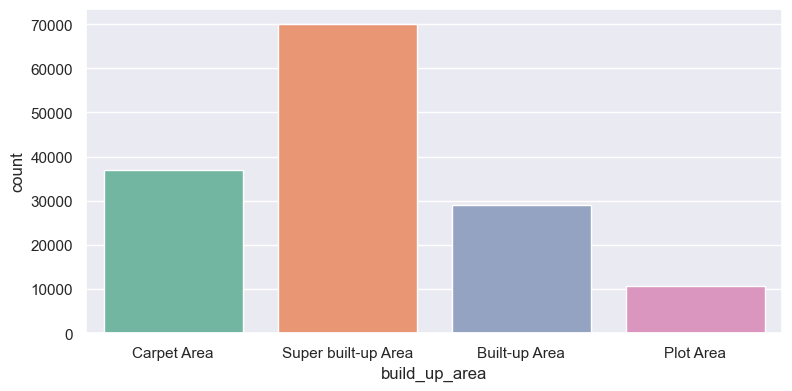

In [4]:
print("Numbers Of Area Type :")
print()
print(df['build_up_area'].value_counts())
sns.set(rc = {'figure.figsize':(8,4)})
sns.countplot(x='build_up_area', data=df, palette ='Set2')

Types of Property :

Residential    102024
Independent     41243
Studio           2606
Serviced          363
Farm              161
for               118
Floor              13
Name: Type_of_property, dtype: int64


<Axes: xlabel='Type_of_property', ylabel='count'>

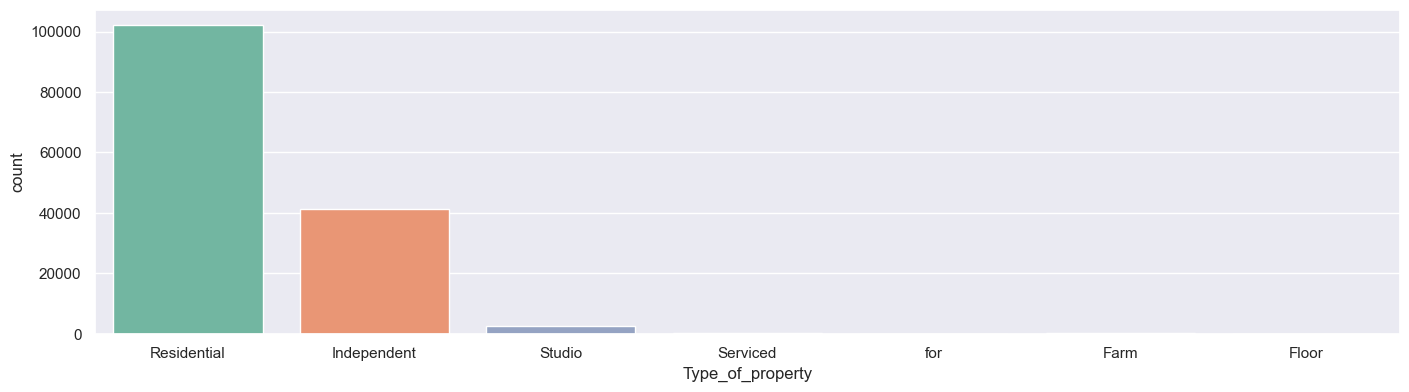

In [5]:
print("Types of Property :")
print()
print(df['Type_of_property'].value_counts())
sns.set(rc = {'figure.figsize':(15,4)})
sns.countplot(x='Type_of_property', data=df, palette ='Set2')

Property Location Based on City : 

ncr            42016
mumbai         37566
bangalore      25600
pune           18176
chennai         9973
hyderabad       7131
Ahmedabad       5602
Trivandraum      464
Name: city, dtype: int64


<Axes: xlabel='city', ylabel='count'>

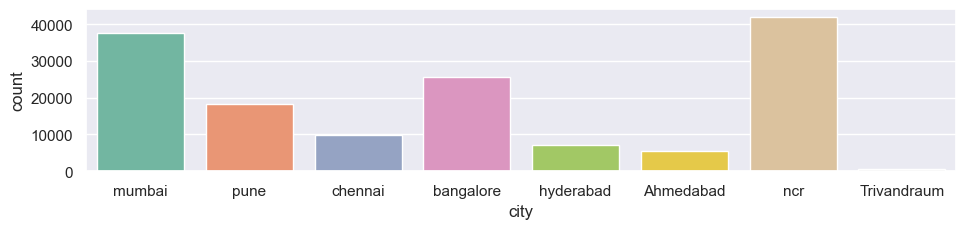

In [6]:
print("Property Location Based on City : ")
print()
print(df['city'].value_counts())
sns.set(rc = {'figure.figsize':(10,2)})
sns.countplot(x='city', data=df, palette ='Set2')

<Axes: xlabel='monthly_rant'>

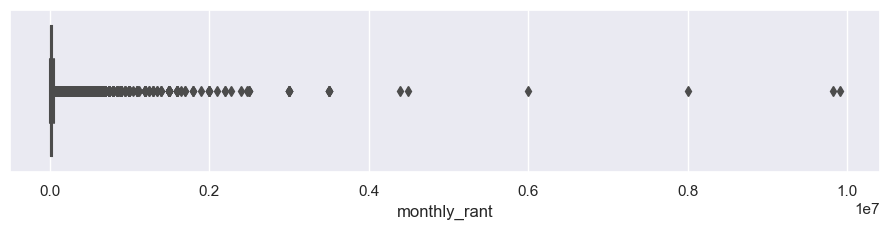

In [7]:
sns.boxplot(x=df['monthly_rant'])

<Axes: >

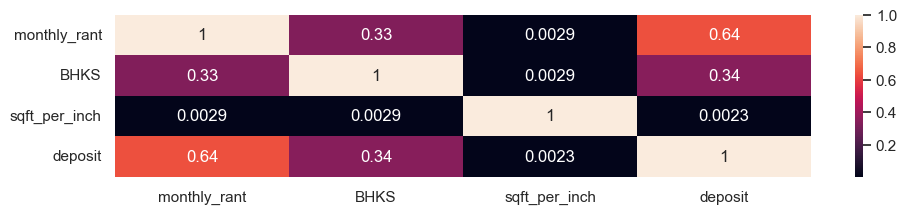

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.describe(include='all')

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
count,146528,1.465280e+05,146528.000000,146528,1.465280e+05,146528,146528,146528,1.465280e+05
unique,8,NaN,NaN,41,NaN,4,7,12555,NaN
top,ncr,NaN,NaN,2 Baths,NaN,Super built-up Area,Residential,Goregaon (East),NaN
freq,42016,NaN,NaN,68767,NaN,69918,102024,807,NaN
mean,NaN,3.414242e+04,2.159703,NaN,2.463806e+03,NaN,NaN,NaN,1.203667e+05
std,NaN,8.428243e+04,1.107673,NaN,1.816119e+05,NaN,NaN,NaN,2.937736e+05
min,NaN,5.000000e+02,1.000000,NaN,1.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,NaN,1.300000e+04,1.000000,NaN,6.800000e+02,NaN,NaN,NaN,3.000000e+04
50%,NaN,2.000000e+04,2.000000,NaN,1.057000e+03,NaN,NaN,NaN,6.000000e+04
75%,NaN,3.290000e+04,3.000000,NaN,1.500000e+03,NaN,NaN,NaN,1.250000e+05


In [10]:
df.isnull().sum()

city                        0
monthly_rant                0
BHKS                        0
Baths                       0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

In [11]:
df.drop(['Baths','location_of_the_property'],axis=1,inplace=True)

In [12]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Serviced', 'for', 'Farm',
       'Floor'], dtype=object)

In [13]:
df=df[df.Type_of_property!='for']
df=df[df.Type_of_property!='Serviced']
df=df[df.Type_of_property!='Floor']

<Axes: xlabel='monthly_rant', ylabel='Density'>

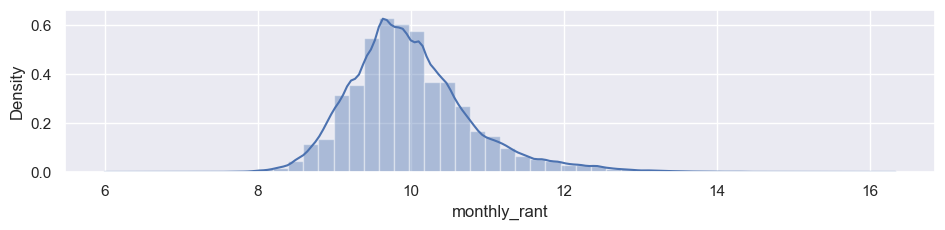

In [14]:
df['monthly_rant']=np.log1p(df['monthly_rant'])
sns.distplot(df['monthly_rant'])

In [15]:
cty = LabelEncoder()
b_u_a = LabelEncoder()
T_o_p = LabelEncoder()
#L_o_t_p = LabelEncoder()

df['city'] = cty.fit_transform(df['city'])
df['build_up_area'] = b_u_a.fit_transform(df['build_up_area'])
df['Type_of_property'] = T_o_p.fit_transform(df['Type_of_property'])
#df['Location of the property'] = L_o_t_p.fit transform(df['location of the property’],

In [16]:
print("city",df['city'].unique())
print(cty.inverse_transform(list(df['city'].unique())))
print()
print("build_up_area:",df['build_up_area'].unique())
print(b_u_a.inverse_transform(list(df['build_up_area'].unique())))
print()
print("Type_of_property", df['Type_of_property'].unique())
print(T_o_p.inverse_transform(list(df['Type_of_property'].unique())))
print()

#print("location_of_the_property",df[ "location_of_the_property’].unique())
#print(L_o_t p.inverse_transform(list(df['location_of_the_property'].unique())))


city [5 7 3 2 4 0 6 1]
['mumbai' 'pune' 'chennai' 'bangalore' 'hyderabad' 'Ahmedabad' 'ncr'
 'Trivandraum']

build_up_area: [1 3 0 2]
['Carpet Area' 'Super built-up Area' 'Built-up Area' 'Plot Area']

Type_of_property [2 1 3 0]
['Residential' 'Independent' 'Studio' 'Farm']



In [17]:
#Seperating the variable Independent matrix X and dependent Vector y

x = df.drop('monthly_rant',axis=1)
y = df.monthly_rant

In [18]:
# Spliting the data into Training set & Test set

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [19]:
print('Shape of xtrain {}'.format(xtrain.shape))
print('Shape of xtest {}'.format(xtest.shape))
print('shape of ytrain {}'.format(ytrain.shape))
print('Shape of ytest {}'.format(ytest.shape))

Shape of xtrain (116827, 6)
Shape of xtest (29207, 6)
shape of ytrain (116827,)
Shape of ytest (29207,)


In [20]:
st=StandardScaler()
xtrain_scaled=st.fit_transform(xtrain)
xtest_scaled=st.transform(xtest)    

In [21]:
#Model Building

In [22]:
def linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest):
    lr=LinearRegression()
    lr.fit(xtrain_scaled,ytrain)
    ypred=lr.predict(xtest_scaled)
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Linear Regression model=***')
    print('Score for Linear Regression model is {}'.format(score))
    print('RMSE for Linear Regression model is {}'.format(rmse))

In [23]:
def random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    rf=RandomForestRegressor()
    rf.fit(xtrain_scaled,ytrain)
    ypred=(rf.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np. sqrt (mean_squared_error(ytest,ypred))
    print('***Random Forest Regressor Model***')
    print('Score for Random Forest Regressor Model is {}'.format(score))
    print('RMSE for Random Forest Regressor Model is {}'.format(rmse))
    

In [24]:
def gradient_boosting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    gb=GradientBoostingRegressor()
    gb.fit(xtrain_scaled,ytrain)
    ypred=(gb.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Gradient Boosting Regressor Model***')
    print('Score for Gradient Boosting Regressor Model is {}'.format(score))
    print('RMSE for Gradient Boosting Regressor Model is {}'.format(rmse))

In [25]:
def model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest):
    linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    gradient_boosting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)

In [26]:
rf=RandomForestRegressor()

In [27]:
model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest)


***Linear Regression model=***
Score for Linear Regression model is 0.47784477380544765
RMSE for Linear Regression model is 0.574125771758495
----------------------------------------------------------------------------------------------------
***Random Forest Regressor Model***
Score for Random Forest Regressor Model is 0.8941870016584749
RMSE for Random Forest Regressor Model is 0.2584501199410434
----------------------------------------------------------------------------------------------------
***Gradient Boosting Regressor Model***
Score for Gradient Boosting Regressor Model is 0.877853968570921
RMSE for Gradient Boosting Regressor Model is 0.2776814754062416
----------------------------------------------------------------------------------------------------


In [28]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))